In [1]:
import numpy as np 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [26]:
X, y = make_blobs(centers=3, random_state=42)
# here we will not use y (we are just receiving)

In [18]:
import seaborn as sns

<AxesSubplot:>

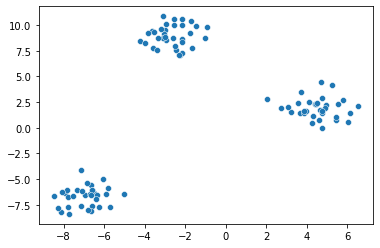

In [45]:
sns.scatterplot(x=X[:,0],y=X[:,1])

In [21]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters=2)

In [24]:
model.fit(X)

KMeans(n_clusters=2)

In [25]:
y_gen = model.labels_

<AxesSubplot:>

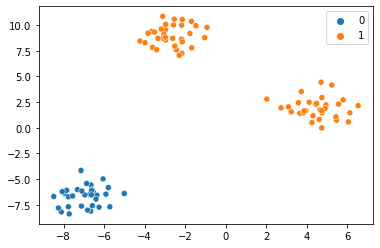

In [44]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue = y_gen)

In [29]:
model.cluster_centers_

array([[-6.95170962, -6.67621669],
       [ 0.86236563,  5.48955564]])

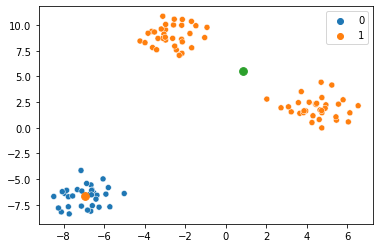

In [42]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue = y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

## Custom implementation of KNN

In [31]:
import random

In [39]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        # making the required number of clusters
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
        
        for i in range(self.max_iters):
            
            labels = []
        
            # going for each point
            for point in X:

                # collecting distances from every cluster (cluster se dist ka matlab uske center se dist)
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                
                # iss point k corresponding closest_idx naam ka label assign kar diya
                labels.append(closest_idx)  
                
            # modifying center of clusters to get better results in next iteration
            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]


In [40]:
model = CustomKMeans(n_clusters=2)

model.fit(X)

<AxesSubplot:>

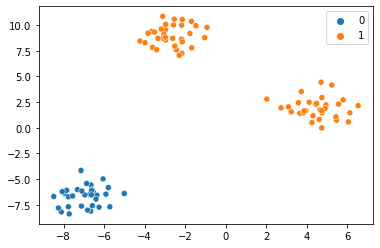

In [43]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=model.labels_)